# APIs


## Tasks Today:
1) <b>Requests and the pokemon API </b> <br>
 

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [7]:
# making an API call
import requests

pokemon = input('Enter a pokemon: ')

url = f'https://pokeapi.co/api/v2/{pokemon}/'

response = requests.get(url)

if response.status_code == 200:
    print('success')
    data = response.json()
else:
    print(f'Error, status code {response.status_code}')

Enter a pokemon: 700
Error, status code 404


In [8]:
print(data['name'])

sylveon


### Display a Pokemon's name, weight, abilities, and types

In [9]:
# get the name
name = data['name']
print(name)

sylveon


In [12]:
# get types
types = data['types']
types = list(map(lambda x: x['type']['name'], types))
print(types)

['fairy']


In [13]:
# get weight
weight = data['weight']
print(weight)

235


In [14]:
# get abilities
abilities = data['abilities']
abilities = list(map(lambda x: x['ability']['name'], abilities))
print(abilities)

['cute-charm', 'pixilate']


In [15]:
# Create a structure for a single pokemon
class Pokemon:
    def __init__(self,name,types,weight,abilities):
        self.name = name
        self.types = types
        self.weight = weight
        self.abilities = abilities

#### Create a function to Pull in your own Pokemon's data 

In [16]:
def poke_api_call(pokemon):
    # Use the pokemon parameter to make a request to the pokeapi
    response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}/')
    
    # if the status code is 200:
    if response.status_code == 200:
        # Get the pokemon's data with the json method
        data = response.json()
        # Pull out the name, weight, types, abilities
        name = data['name']
        
        types = data['types']
        types = list(map(lambda x: x['type']['name'], types))
        
        weight = data['weight']
        
        abilities = data['abilities']
        abilities = list(map(lambda x: x['ability']['name'], abilities))
        # Create an instance of the Pokemon class
        pokemon = Pokemon(name, types, weight, abilities)
        # Return the instance of the class
        return pokemon
    # if the status code is not 200, print an error message
    else:
        print(f'ERROR, STATUS CODE {response.status_code}')

Choose your pokemon

In [17]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]

your_team = [700, 30, 500, 15, 25, 6]


In [18]:
random_team = list(map(poke_api_call, random_team))

In [19]:
print(random_team)

[<__main__.Pokemon object at 0x7f9b52dec940>, <__main__.Pokemon object at 0x7f9b4fb76100>, <__main__.Pokemon object at 0x7f9b52c34790>, <__main__.Pokemon object at 0x7f9b5281cca0>, <__main__.Pokemon object at 0x7f9b52135550>, <__main__.Pokemon object at 0x7f9b52a0d040>]


In [20]:
your_team = list(map(poke_api_call, your_team))

In [21]:
print(your_team)

[<__main__.Pokemon object at 0x7f9b527e2d30>, <__main__.Pokemon object at 0x7f9b527d5c40>, <__main__.Pokemon object at 0x7f9b521a5550>, <__main__.Pokemon object at 0x7f9b519b9ac0>, <__main__.Pokemon object at 0x7f9b52ce1f10>, <__main__.Pokemon object at 0x7f9b52ce1f40>]


In [22]:
for team_member in random_team:
    print(team_member.name)

drifloon
roserade
pyukumuku
ledian
cranidos
darmanitan-standard


#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [23]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}

for team_member in your_team:
    my_six_pokemon[team_member.name] = team_member
    print(my_six_pokemon)


{'sylveon': <__main__.Pokemon object at 0x7f9b527e2d30>}
{'sylveon': <__main__.Pokemon object at 0x7f9b527e2d30>, 'nidorina': <__main__.Pokemon object at 0x7f9b527d5c40>}
{'sylveon': <__main__.Pokemon object at 0x7f9b527e2d30>, 'nidorina': <__main__.Pokemon object at 0x7f9b527d5c40>, 'emboar': <__main__.Pokemon object at 0x7f9b521a5550>}
{'sylveon': <__main__.Pokemon object at 0x7f9b527e2d30>, 'nidorina': <__main__.Pokemon object at 0x7f9b527d5c40>, 'emboar': <__main__.Pokemon object at 0x7f9b521a5550>, 'beedrill': <__main__.Pokemon object at 0x7f9b519b9ac0>}
{'sylveon': <__main__.Pokemon object at 0x7f9b527e2d30>, 'nidorina': <__main__.Pokemon object at 0x7f9b527d5c40>, 'emboar': <__main__.Pokemon object at 0x7f9b521a5550>, 'beedrill': <__main__.Pokemon object at 0x7f9b519b9ac0>, 'pikachu': <__main__.Pokemon object at 0x7f9b52ce1f10>}
{'sylveon': <__main__.Pokemon object at 0x7f9b527e2d30>, 'nidorina': <__main__.Pokemon object at 0x7f9b527d5c40>, 'emboar': <__main__.Pokemon object at 

## Lets create a class called 'Pokemon' and create our pokemon as instances

In [26]:
class Pokemon:
    def __init__(self,name):
        self.name = name
        self.types = None
        self.weight = None
        self.abilities = None
        self.sprite = None
        self.poke_api_call()
        
    def poke_api_call(self):
        # Use the pokemon parameter to make a request to the pokeapi
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}/')
        # if the status code is 200:
        if response.status_code == 200:
            # Get the pokemon's data with the json method
            data = response.json()
            # Pull out the name, weight, types, abilities
            self.name = data['name']
            types = data['types']
            self.types = list(map(lambda x: x['type']['name'], types))
            self.weight = data['weight']
            abilities = data['abilities']
            self.abilities = list(map(lambda x: x['ability']['name'], abilities))
            self.sprite = data['sprites']['front_default']
            # if the status code is not 200, print an error message
        else:
            print(f'ERROR, STATUS CODE {response.status_code}')

In [27]:
pikachu = Pokemon('pikachu')

In [28]:
pikachu.sprite

'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/25.png'

### Let's Catch some Pokemon

In [30]:
class Pokedex:
    def __init__(self):
        self.pokemon = {}
        
    def add_pokemon(self, name):
        new_pokemon = Pokemon(name)
        self.pokemon[new_pokemon.name] = new_pokemon
        


In [33]:
my_pokedex = Pokedex()

In [34]:
my_pokedex.add_pokemon('pikachu')

In [35]:
my_pokedex.add_pokemon(10)

In [36]:
my_pokedex.pokemon

{'pikachu': <__main__.Pokemon at 0x7f9b543e5340>,
 'caterpie': <__main__.Pokemon at 0x7f9b543e5fd0>}

## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [39]:
# Display an image in Jupyter notebook
from IPython.display import Image

#display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))


In [40]:
class Pokemon:
    def __init__(self,name):
        self.name = name
        self.types = None
        self.weight = None
        self.abilities = None
        self.sprite = None
        self.poke_api_call()
        
    def poke_api_call(self):
        # Use the pokemon parameter to make a request to the pokeapi
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}/')
        # if the status code is 200:
        if response.status_code == 200:
            # Get the pokemon's data with the json method
            data = response.json()
            # Pull out the name, weight, types, abilities
            self.name = data['name']
            types = data['types']
            self.types = list(map(lambda x: x['type']['name'], types))
            self.weight = data['weight']
            abilities = data['abilities']
            self.abilities = list(map(lambda x: x['ability']['name'], abilities))
            self.sprite = data['sprites']['front_default']
            # if the status code is not 200, print an error message
        else:
            print(f'ERROR, STATUS CODE {response.status_code}')
            
    def display_pokemon(self):
        display(Image(self.sprite, width = 300))

In [41]:
pikachu = Pokemon('pikachu')

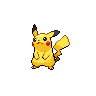

In [42]:
# Calling our new method
pikachu.display_pokemon()

## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [321]:
class Pokemon:
    def __init__(self,name):
        self.name = name
        self.types = None
        self.weight = None
        self.abilities = None
        self.sprite = None
        self.poke_api_call()
        
    def poke_api_call(self):
        # Use the pokemon parameter to make a request to the pokeapi
        response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}/')
        # if the status code is 200:
        if response.status_code == 200:
            # Get the pokemon's data with the json method
            data = response.json()
            # Pull out the name, weight, types, abilities
            self.name = data['name']
            types = data['types']
            self.types = list(map(lambda x: x['type']['name'], types))
            self.weight = data['weight']
            abilities = data['abilities']
            self.abilities = list(map(lambda x: x['ability']['name'], abilities))
            self.sprite = data['sprites']['front_default']
            # if the status code is not 200, print an error message
        else:
            print(f'ERROR, STATUS CODE {response.status_code}')
            
    def display_pokemon(self):
        display(Image(self.sprite, width = 300))
        
    def evolve_pokemon(self):
        

Now let's evolve a few

#  Final Exercise(Optional): <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [19]:
class Move_Tutor:
    def __init__(self):
        self.move_list = []

In [81]:
pikachu.teach_move()


What move would you like to teach pikachu? spark
pikachu learned spark!


In [79]:
pikachu.show_moves()

pikachu's moves'
thunder
surf
earthquake
